# Probability distributions Exercise 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

seed = 5885
rng = np.random.default_rng(seed)

In [2]:
# We'll need this a few times, so write a function to take the x values and 
# plot a histogram comparing to the analytic function func
def plot_distribution(x, func):
    plt.clf()
    plt.hist(x, density=True, bins=100, histtype = 'step')
    xx = np.linspace(0.0,max(x),100)
    plt.plot(xx, func(xx),':')
    plt.yscale('log')
    plt.xlabel('x')
    plt.show()

## Rejection method

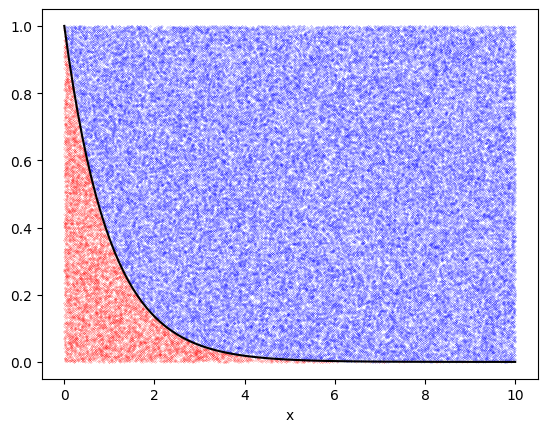

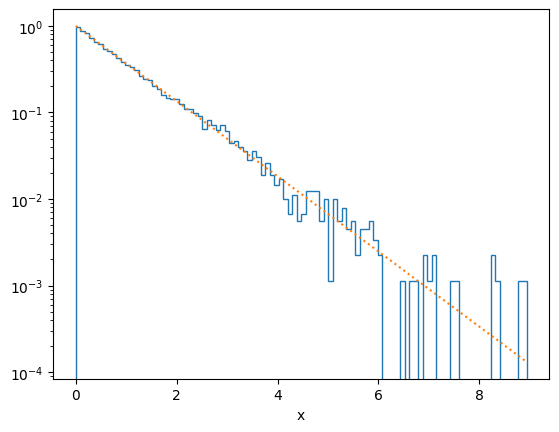

In [3]:
def f(x):
    return np.exp(-x)

xmax = 10
x = xmax * rng.uniform(size = 10**5)    # Generate x values up to xmax
y = rng.uniform(size = 10**5)

# Reject
ind = np.where(y <= f(x))
ind2 = np.where(y > f(x))

# Plot the points to show which ones are accepted and which rejected
plt.plot(x[ind2],y[ind2], 'bo', ms=0.1)
plt.plot(x[ind],y[ind], 'ro', ms=0.1)
# Plot the analytic solution for the boundary (see below)
xx = np.linspace(0.0,xmax,100)
plt.plot(xx, f(xx), 'k')
plt.xlabel('x')
plt.show()

plot_distribution(x[ind], f)

## Transformation method

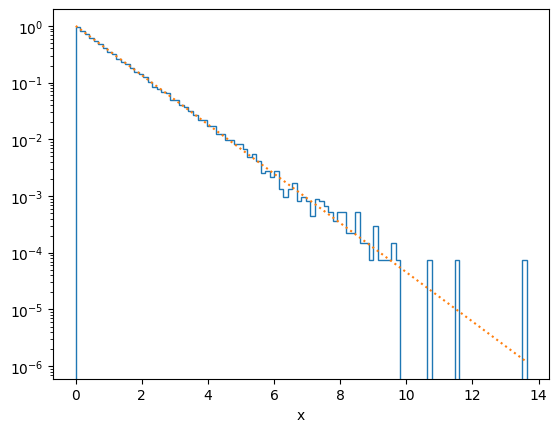

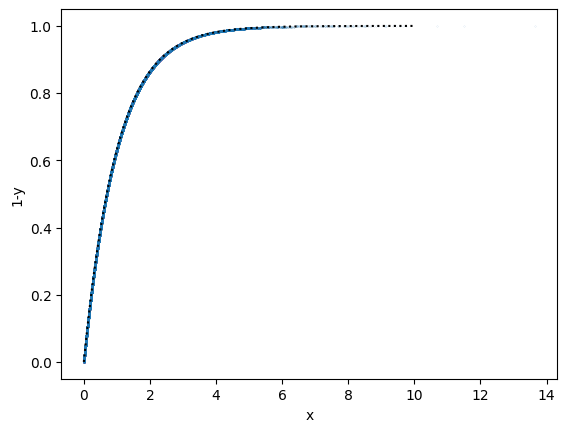

In [4]:
y = rng.uniform(size = 10**5)

x = - np.log(y)

# Plot the distribution of x and compare with the exponential distribution
plot_distribution(x, f)

# Plot 1-y(x) to illustrate that y is related to the cumulative distribution function
plt.clf()
plt.plot(x, 1-y, '.', ms=0.1)
xx = np.linspace(0.0,xmax,100)
plt.plot(xx, 1-f(xx), 'k:')
plt.xlabel('x')
plt.ylabel('1-y')
plt.show()

## Ratio of uniforms

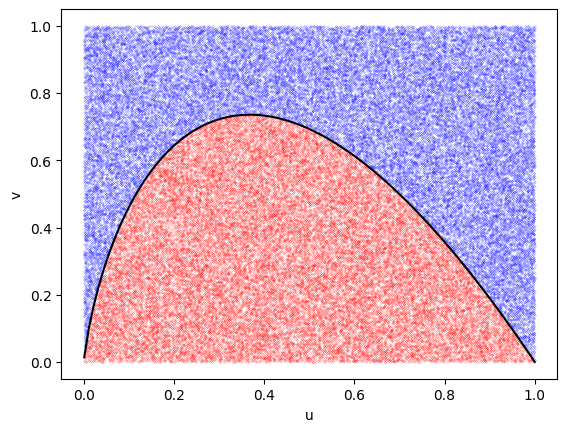

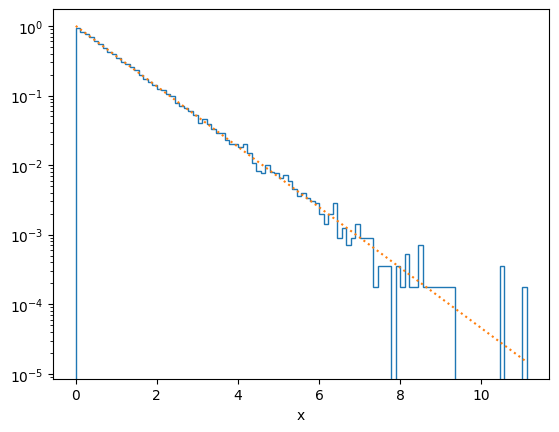

In [5]:
def f(x):
    return np.exp(-x)

u = rng.uniform(size = 10**5)
v = rng.uniform(size = 10**5)
# choose which points to keep -- we renormalize f here to drop the factor of 2
ind = np.where(u <= np.sqrt(f(v/u)))
ind2 = np.where(u > np.sqrt(f(v/u)))
x = v[ind]/u[ind]

# Plot the points to show which ones are accepted and which rejected
plt.plot(u[ind2],v[ind2], 'bo', ms=0.1)
plt.plot(u[ind],v[ind], 'ro', ms=0.1)
# Plot the analytic solution for the boundary (see below)
uu = np.linspace(0.001,1.0,100)
plt.plot(uu, -2*uu*np.log(uu), 'k')
plt.xlabel('u')
plt.ylabel('v')
plt.show()

# Plot the distribution f(x)
plot_distribution(x, f)

The black curve above separates the accepted and rejected points. To derive this, start with

$$u \leq \sqrt{\exp\left(-{v\over u}\right)}$$

and invert this to get $v$:

$$u^2 \leq \exp\left(-{v\over u}\right)$$

$$2\ln u \leq -{v\over u}$$

$$2 u \ln u \leq -v$$

$$v \leq -2 u \ln u$$

which is plotted as the black curve in the figure.